# Warehouse key variables exploration
*This notebook illustrates how to assess the inventory position of a storage system.
*Use the virtual environment logproj.yml to run this notebook.*
***
Alessandro Tufano 2020

### Import packages

In [1]:
# %% append functions path
import sys; sys.path.insert(0, '..') #add the above level with the package

import pandas as pd
import numpy as np

from IPython.display import display, HTML #display dataframe

#import utilities
from logproj.utilities import creaCartella

### Set data fields

In [2]:
string_casestudy = 'TOY_DATA'

### Import data

In [3]:
# %% import data
from logproj.data_generator_warehouse import generateWarehouseData
D_locations, D_SKUs, D_movements, D_inventory = generateWarehouseData()


In [4]:
#print locations dataframe
display(HTML(D_locations.head().to_html()))

,NODECODE,IDWH,WHSUBAREA,IDLOCATION,LOCCODEX,LOCCODEY,LOCCODEZ,RACK,BAY,LEVEL
0,1,LOGICAL_WH1,AREA 1,1,0,0,0,0,0,0
0,1,LOGICAL_WH1,AREA 1,2,0,0,1200,0,0,1
0,1,LOGICAL_WH1,AREA 1,3,0,0,2400,0,0,2
0,1,LOGICAL_WH1,AREA 1,4,0,0,3600,0,0,3
0,1,LOGICAL_WH1,AREA 1,5,0,0,4800,0,0,4


In [5]:
#print SKUs master file dataframe
display(HTML(D_SKUs.head().to_html()))

,ITEMCODE,DESCRIPTION,VOLUME,WEIGHT
0,0,PRODOTTO_0,93.281563,1.640019
0,1,PRODOTTO_1,94.861551,8.294063
0,2,PRODOTTO_2,67.576395,2.083772
0,3,PRODOTTO_3,61.634480,5.494261
0,4,PRODOTTO_4,58.136220,2.764705


In [6]:
#print SKUs master file dataframe
display(HTML(D_movements.head().to_html()))

,ITEMCODE,NODECODE,IDWH,WHSUBAREA,IDLOCATION,RACK,BAY,LEVEL,LOCCODEX,LOCCODEY,LOCCODEZ,ORDERCODE,PICKINGLIST,QUANTITY,VOLUME,WEIGHT,TIMESTAMP_IN,INOUT,ORDERTYPE
0,73,1,LOGICAL_WH1,AREA 1,597,1,53,1,4000,42400,1200,631,631,15.614868,1025.751026,74.507173,2020-01-02 00:06:23.308516,-,PICKING
0,25,1,LOGICAL_WH1,AREA 1,461,1,26,0,4000,20800,0,352,352,2.580947,257.431335,24.459458,2020-01-02 01:25:14.497185,-,PICKING
0,3,1,LOGICAL_WH1,AREA 1,679,2,3,3,8000,2400,3600,158,158,6.801851,419.228558,37.371147,2020-01-02 04:10:43.100328,+,PUTAWAY
0,71,1,LOGICAL_WH1,AREA 1,550,1,43,4,4000,34400,4800,335,335,9.103358,220.099564,66.832633,2020-01-02 05:43:16.205675,,PUTAWAY
0,52,1,LOGICAL_WH2,AREA 1,757,2,19,1,8000,15200,1200,573,573,4.983663,366.945650,1.841199,2020-01-02 06:03:54.830625,,PICKING


In [7]:
#print SKUs master file dataframe
display(HTML(D_inventory.head().to_html()))

,NODECODE,IDWH,ITEMCODE,IDLOCATION,QUANTITY,TIMESTAMP
0,1,LOGICAL_WH2,0,169,1.481112,2020-01-02
0,1,LOGICAL_WH2,1,1569,1.034685,2020-01-02
0,1,FAKE,2,312,5.104729,2020-01-02
0,1,FAKE,3,308,9.343983,2020-01-02
0,1,LOGICAL_WH2,4,1093,3.156559,2020-01-02


### Create folder hierarchy

In [8]:
# %% create folder hierarchy
pathResults = 'C:\\Users\\aletu\\desktop'
_, root_path = creaCartella(pathResults,f"{string_casestudy}_results")
_, path_results = creaCartella(root_path,f"P8_warehouseAssessment")

Cartella TOY_DATA_results già esistente
Cartella P8_warehouseAssessment già esistente


### Define a learning table for each picking list

In [9]:
# %% STUDY CORRELATIONS
_, path_current = creaCartella(path_results,f"Correlations")
from logproj.P8_performanceAssessment.wh_explore_metrics import buildLearningTablePickList

# extract learning table for each picking list
D_learning=buildLearningTablePickList(D_movements)
D_learning.to_excel(path_current+"\\learning table.xlsx")

In [10]:
#print the learning table
display(HTML(D_learning.head().to_html()))

,NODECODE,PICKINGLIST,INOUT,sum_QUANTITY,count_QUANTITY,TIMESEC_SPAN,RACK_SPAN,BAY_SPAN,LEVEL_SPAN,LOCCODEX_SPAN,LOCCODEY_SPAN
0,1,0,+,8.181252,1,0,0,0,0,0,0
1,1,1,-,1.012799,1,0,0,0,0,0,0
2,1,2,,13.826443,2,79580,1,53,4,4000,42400
3,1,4,+,43.101729,2,63692,1,20,3,4000,16000
4,1,5,,3.868307,1,0,0,0,0,0,0


### Plot the histograms of the key variables

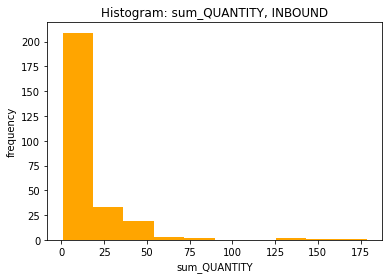

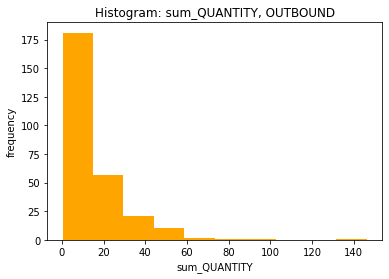

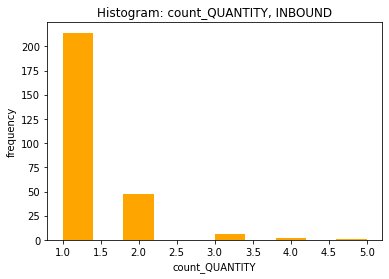

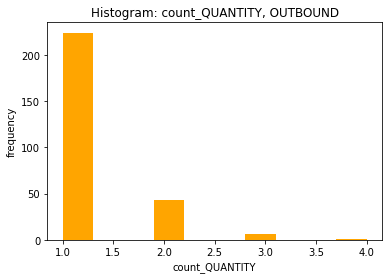

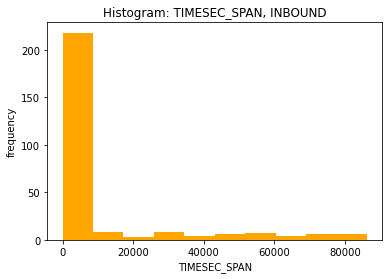

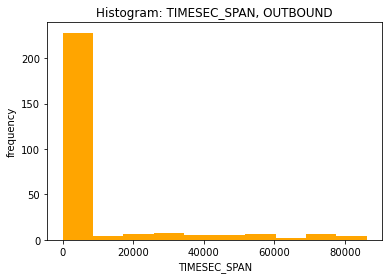

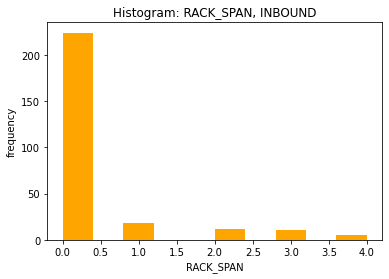

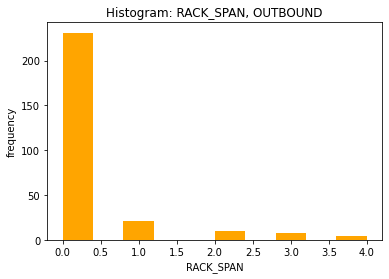

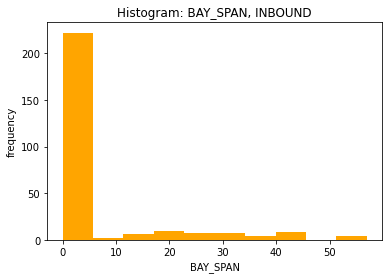

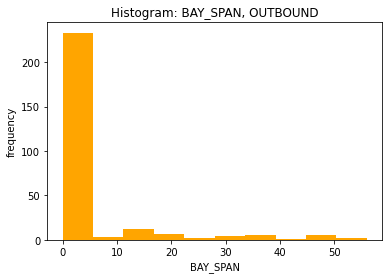

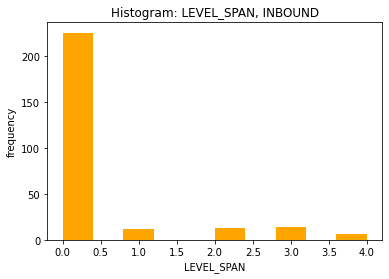

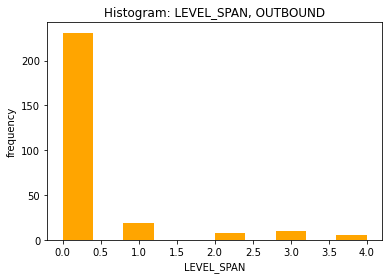

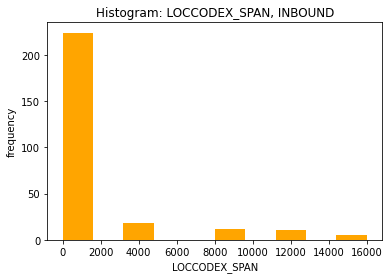

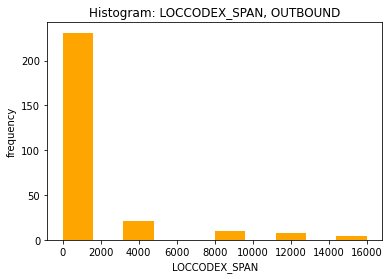

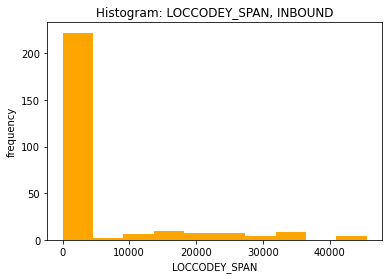

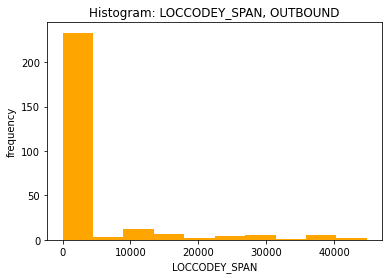

In [11]:
# %% histograms
from logproj.P8_performanceAssessment.wh_explore_metrics import histogramKeyVars
output_figures = histogramKeyVars(D_learning)
for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png") 

### Plot the correlation matrices

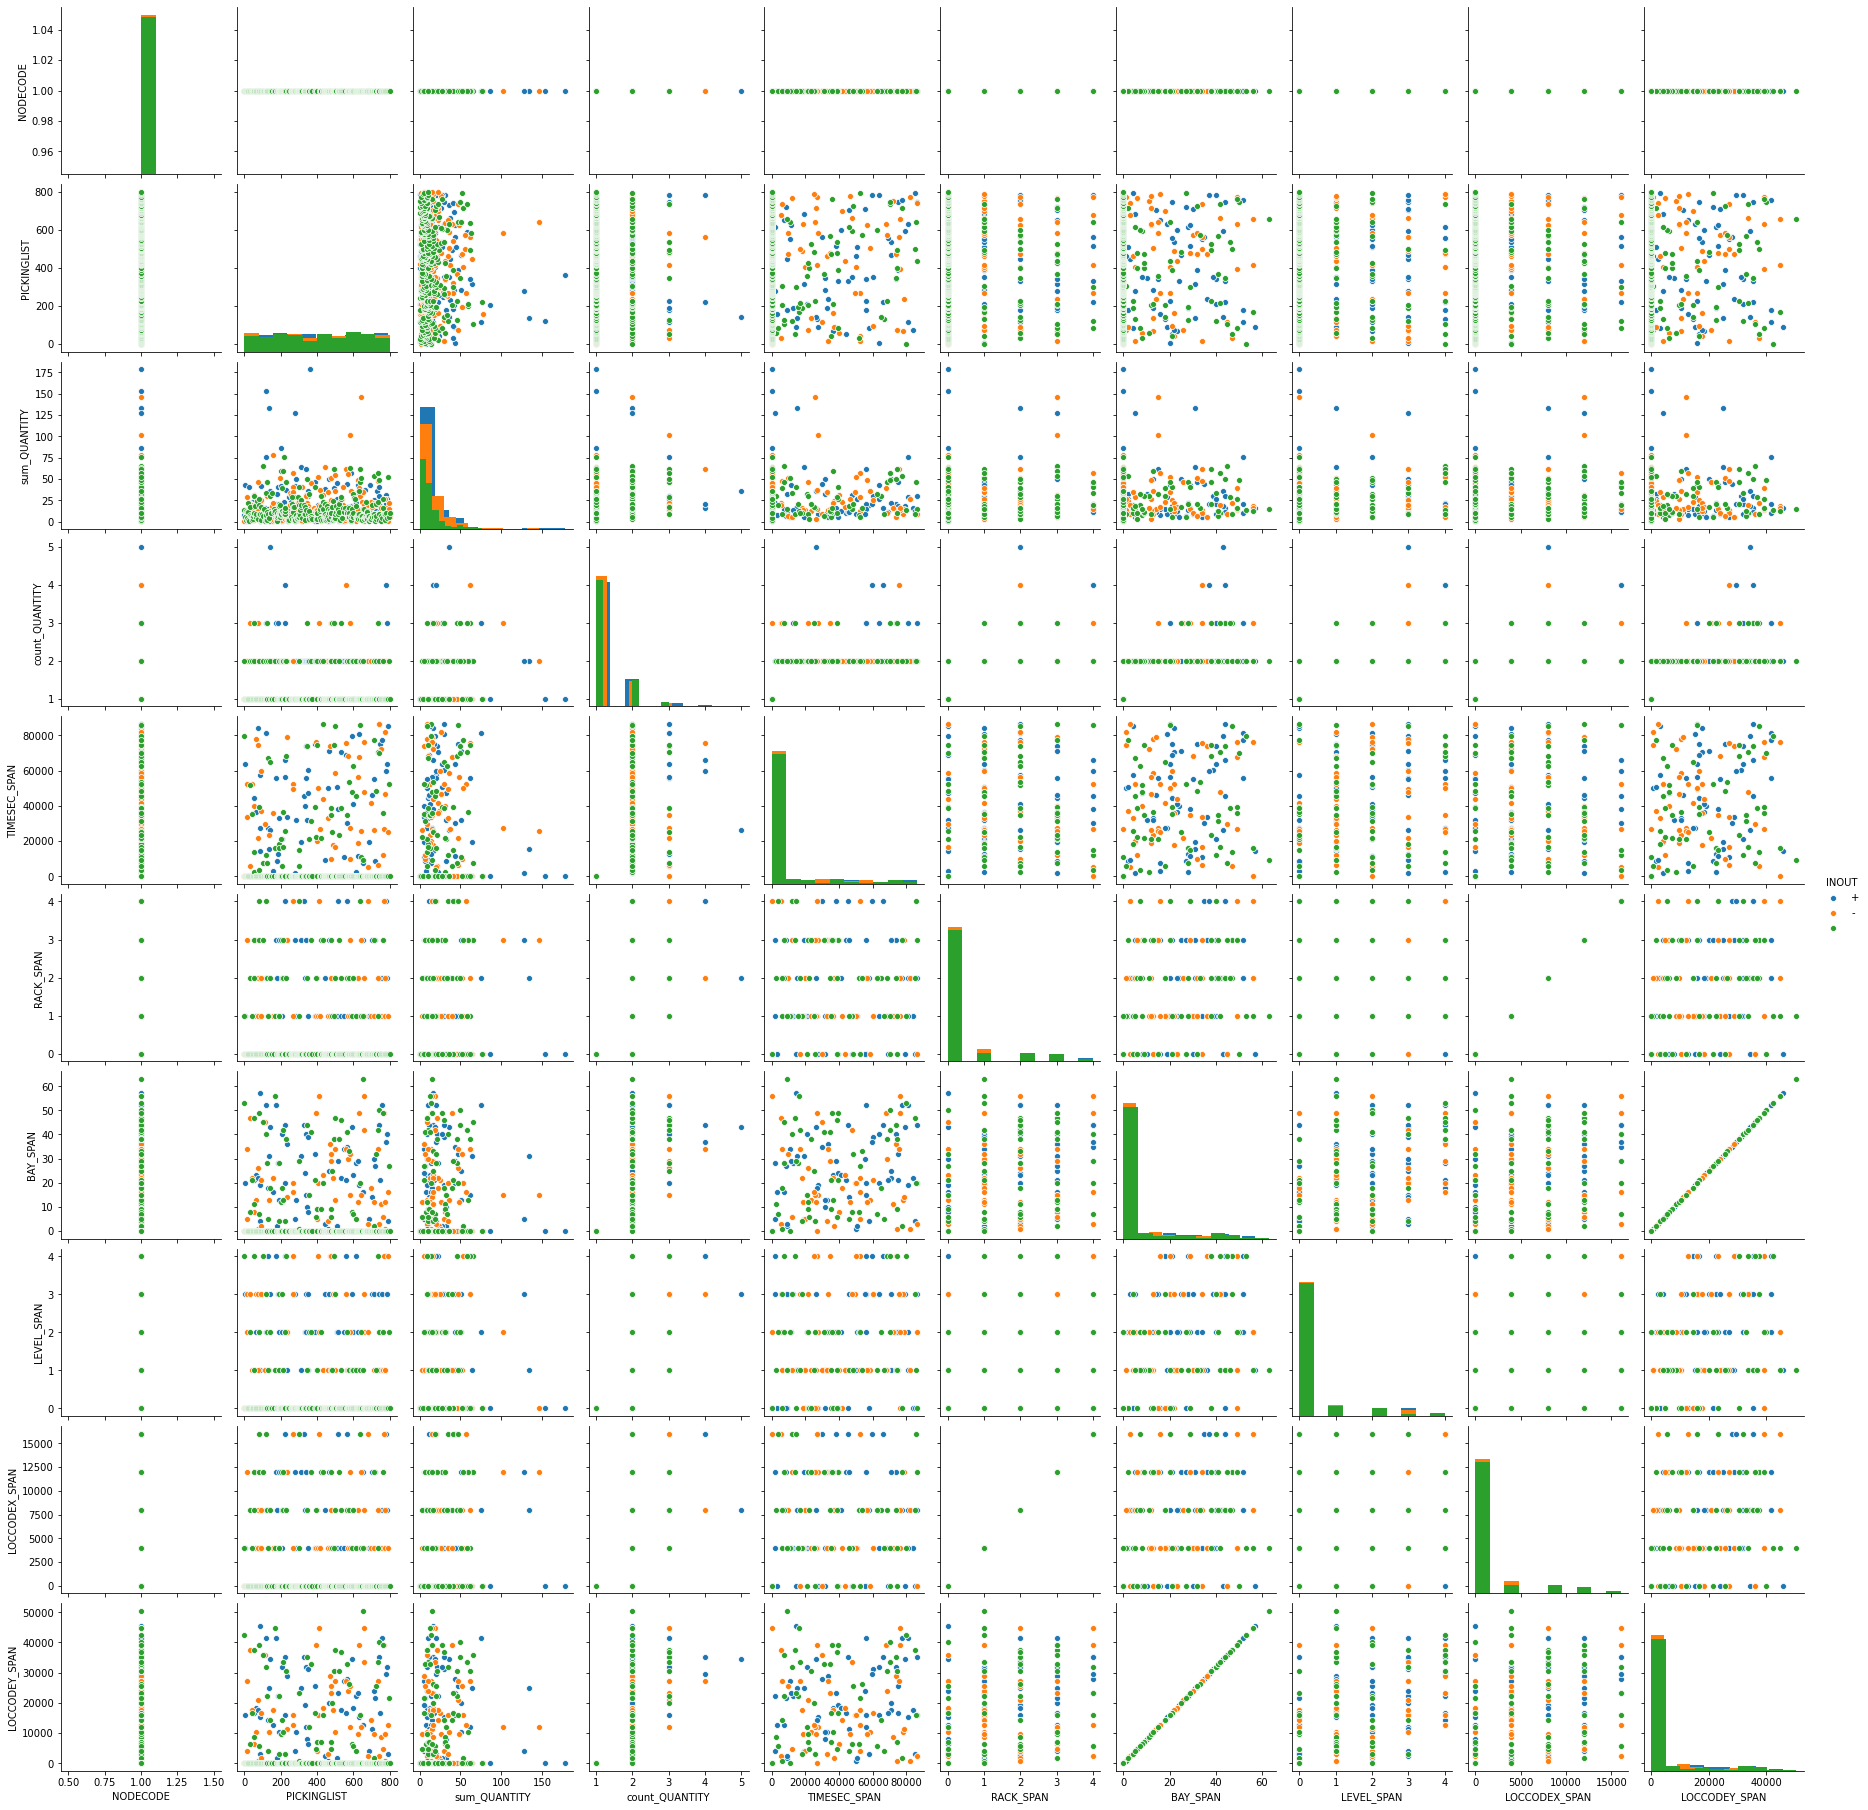

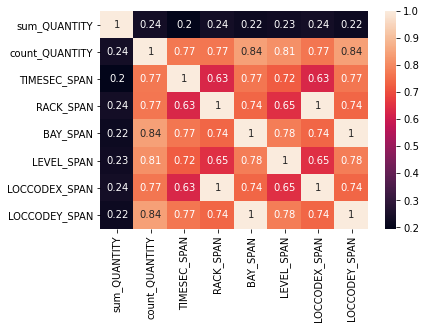

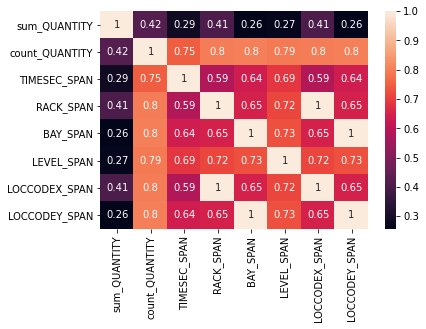

In [12]:
from logproj.P8_performanceAssessment.wh_explore_metrics import exploreKeyVars
output_figures = exploreKeyVars(D_learning)
for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png") 